# Tratamento de Dados de Tomografia por Técnicas de Álgebra Linear Computacional

*Emanuel Piveta Pozzobon, Henrique Valente Nogueira, Pedro Coelho Gimenes de Freitas e Rafael Dalacorte Erdmann*

*Prof. Dr. Vinicius Francisco Wasques*

*Ilum - Escola de Ciência, 2024*

Este caderno tem como fito a solução de sistemas lineares, a partir de dois métodos iterativos: Método de Kaczmarz e Método de Jacob.

Importando as bibliotecas necessárias:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Criando as matrizes (sistemas de equações):

In [2]:
a = np.array([[1, 1], [1, -2], [3, -1]]) 
b = np.array([2, -2, 3])  

x = np.array([1.0, 3.0])

In [3]:
iterations = [x.copy()]

num_iterations = 100

Criando o método de Kaczmarz

In [4]:
for k in range(num_iterations):
    i = k % 3 
    a_i = a[i]
    b_i = b[i]
    
    x = x + (b_i - np.dot(a_i, x)) / np.dot(a_i, a_i) * a_i
    iterations.append(x.copy())

Agora, o Método de Jacobi

In [5]:
A_jacobi = np.array([[1, 1], [1, -2], [3, -1]])
b_jacobi = np.array([2, -2, 3])

x_jacobi = np.array([1.0, 3.0])

iterations_jacobi = [x_jacobi.copy()]

num_iterations_jacobi = 100

In [6]:
for _ in range(num_iterations_jacobi):
    x_new = np.zeros_like(x_jacobi)
    x_new[0] = (b_jacobi[0] - A_jacobi[0][1] * x_jacobi[1]) / A_jacobi[0][0]
    x_new[1] = (b_jacobi[1] - A_jacobi[1][0] * x_jacobi[0]) / A_jacobi[1][1]
    
    x_jacobi = x_new
    iterations_jacobi.append(x_jacobi.copy())

In [7]:
x1_kaczmarz = [x[0] for x in iterations]          # Método de Kaczmarz
x2_kaczmarz = [x[1] for x in iterations]
x1_jacobi = [x[0] for x in iterations_jacobi]     # Método de Jacobi
x2_jacobi = [x[1] for x in iterations_jacobi]

Gráfico do Método de Kaczmarz e Jacobi


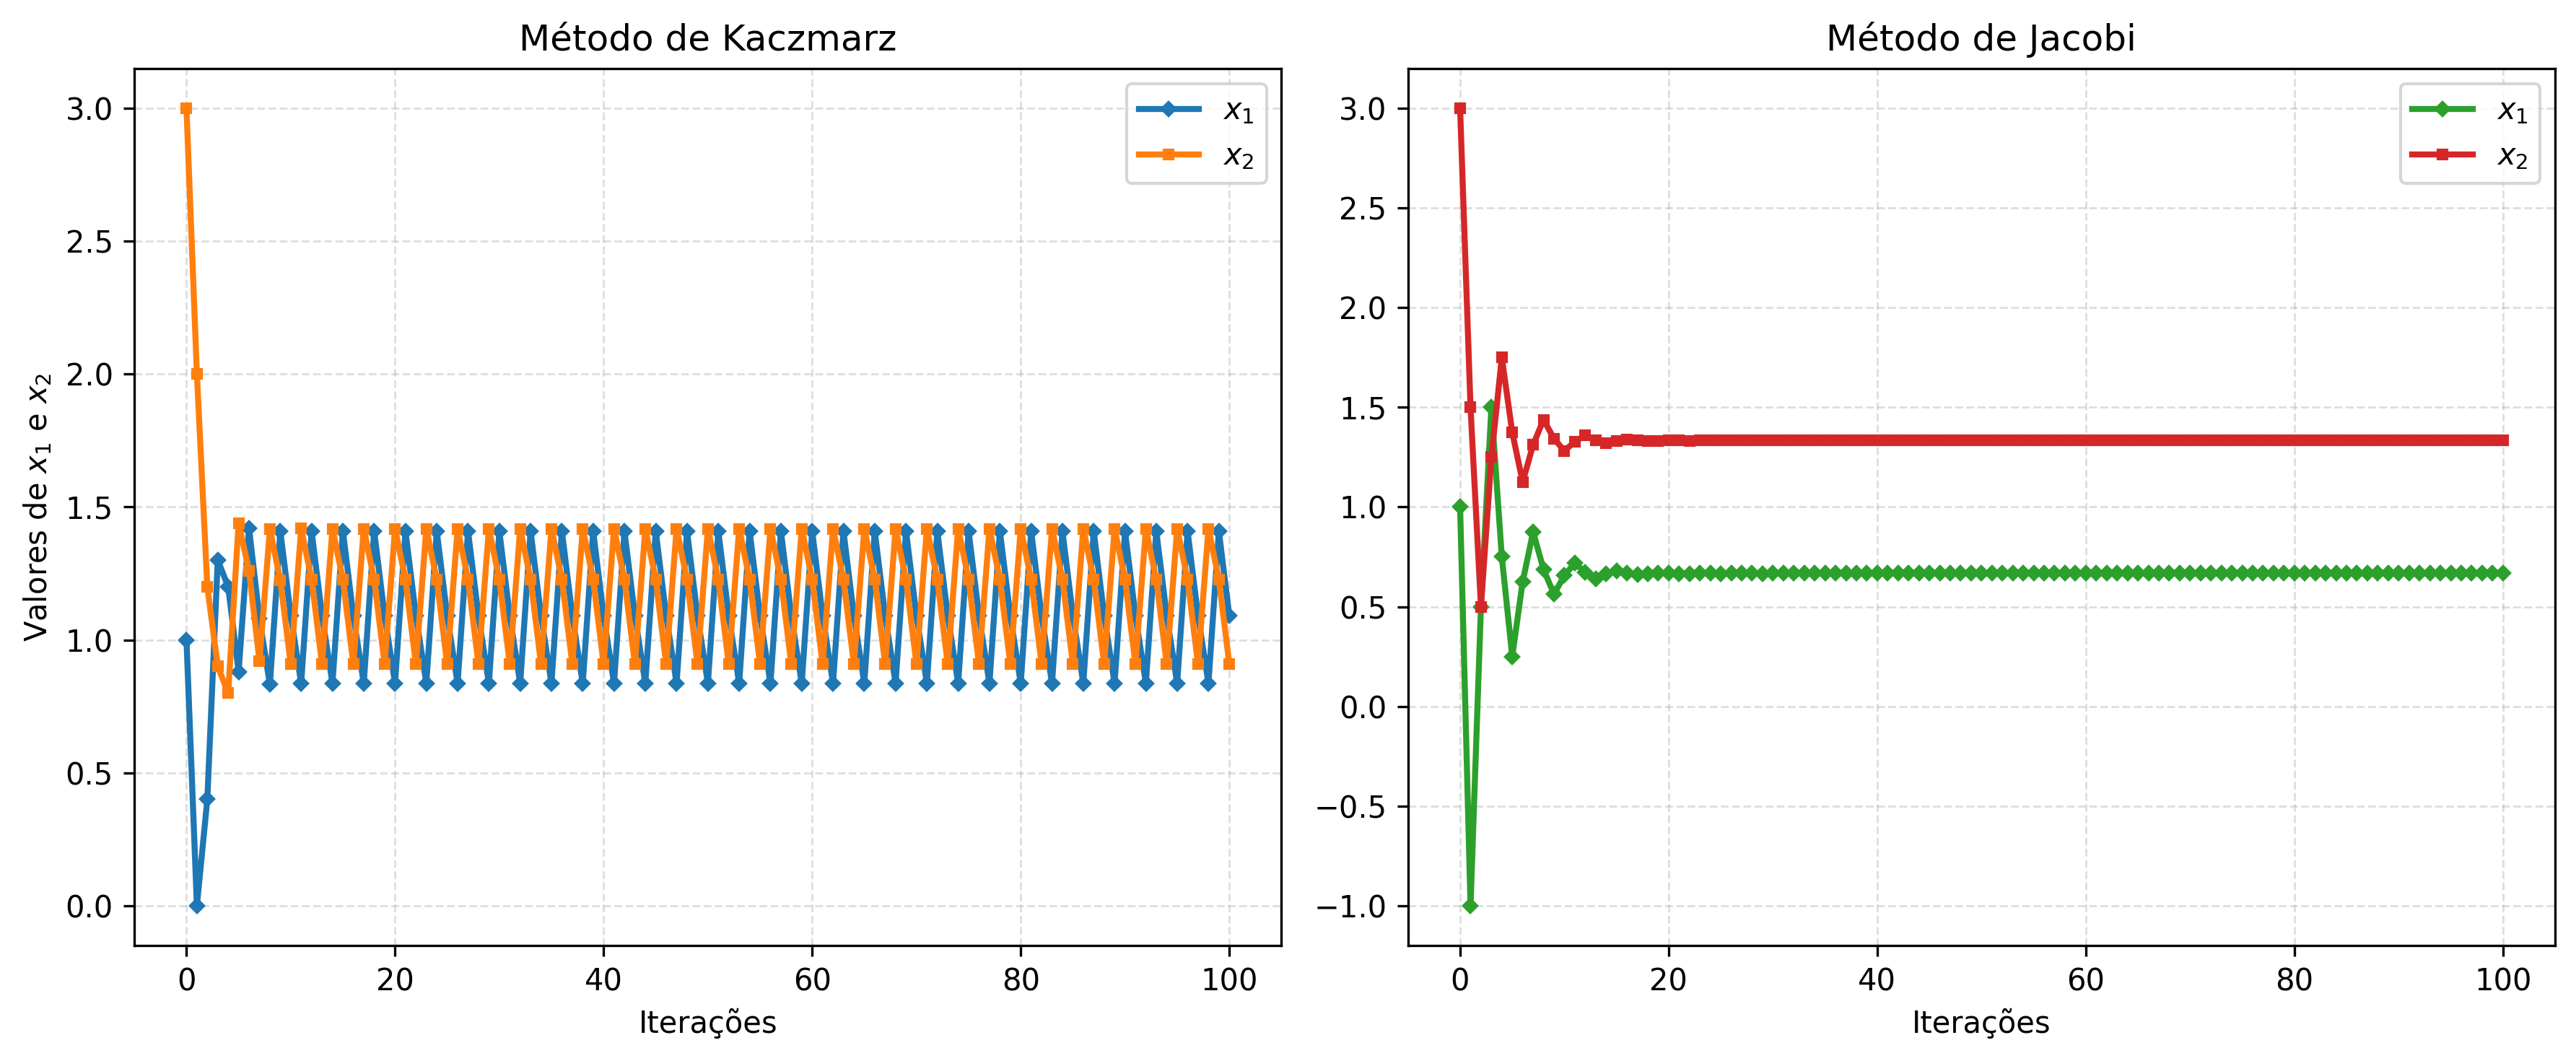

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

# KACZMARZ

ax[0].plot(x1_kaczmarz, label='$x_1$', marker='D', color='#1f77b4', linewidth=2, markersize=3)
ax[0].plot(x2_kaczmarz, label='$x_2$', marker='s', color='#ff7f0e', linewidth=2, markersize=3)
ax[0].set_title('Método de Kaczmarz')
ax[0].set_xlabel('Iterações')
ax[0].set_ylabel('Valores de $x_1$ e $x_2$')
ax[0].legend()
ax[0].grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

# JACOBI 

ax[1].plot(x1_jacobi, label='$x_1$', marker='D', color='#2ca02c', linewidth=2, markersize=3)
ax[1].plot(x2_jacobi, label='$x_2$', marker='s', color='#d62728', linewidth=2, markersize=3)
ax[1].set_title('Método de Jacobi')
ax[1].set_xlabel('Iterações')
ax[1].legend()
ax[1].grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.show()

Definindo as retas do sistema de equações

In [9]:
x_vals = np.linspace(-1, 3, 200)
L1 = (2 - x_vals)          # L1: x1 + x2 = 2
L2 = (x_vals + 2) / 2      # L2: x1 - 2x2 = -2
L3 = (3*x_vals - 3) / 1    # L3: 3x1 - x2 = 3

Preparando as coordenadas para plotar os pontos das iterações


In [10]:
x1_kaczmarz, x2_kaczmarz = zip(*iterations)      
x1_jacobi, x2_jacobi = zip(*iterations_jacobi)   

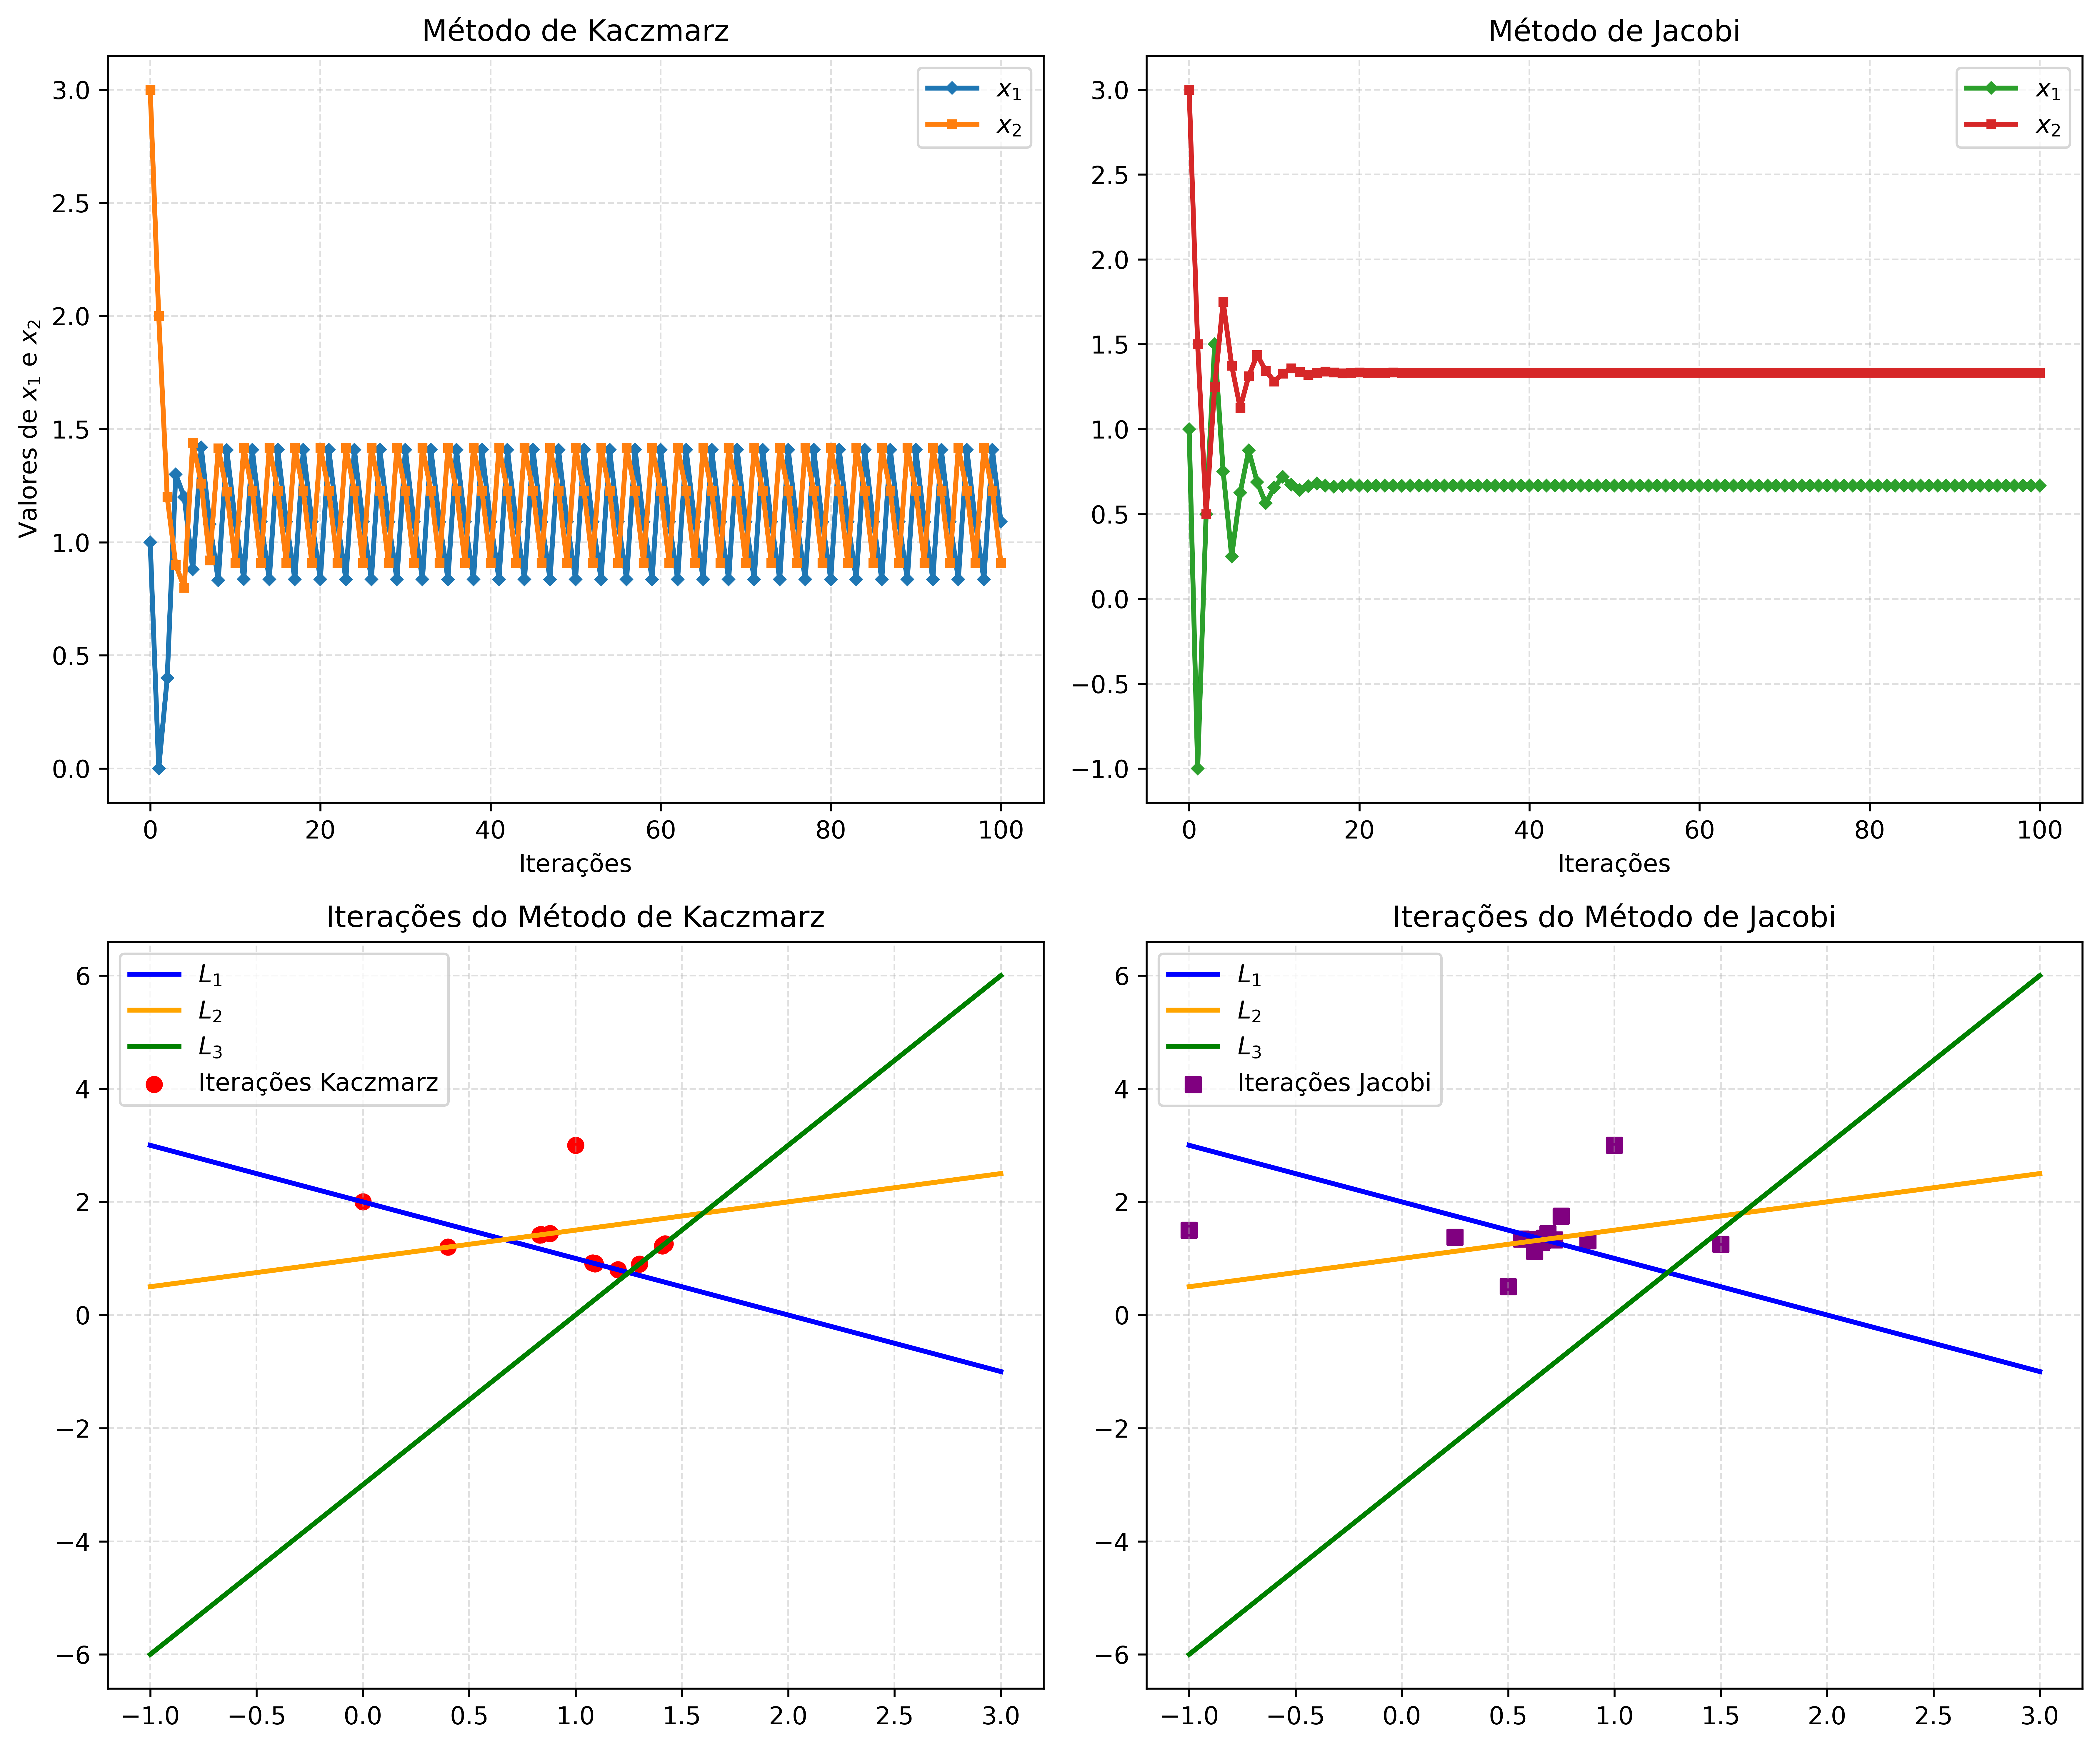

In [11]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10), dpi=600)

axes[0, 0].plot(x1_kaczmarz, label='$x_1$', marker='D', color='#1f77b4', linewidth=2, markersize=3)
axes[0, 0].plot(x2_kaczmarz, label='$x_2$', marker='s', color='#ff7f0e', linewidth=2, markersize=3)
axes[0, 0].set_title('Método de Kaczmarz')
axes[0, 0].set_xlabel('Iterações')
axes[0, 0].set_ylabel('Valores de $x_1$ e $x_2$')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

axes[0, 1].plot(x1_jacobi, label='$x_1$', marker='D', color='#2ca02c', linewidth=2, markersize=3)
axes[0, 1].plot(x2_jacobi, label='$x_2$', marker='s', color='#d62728', linewidth=2, markersize=3)
axes[0, 1].set_title('Método de Jacobi')
axes[0, 1].set_xlabel('Iterações')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

axes[1, 0].plot(x_vals, L1, label='$L_1$', color='blue', linewidth=2)
axes[1, 0].plot(x_vals, L2, label='$L_2$', color='orange', linewidth=2)
axes[1, 0].plot(x_vals, L3, label='$L_3$', color='green', linewidth=2)
axes[1, 0].scatter(x1_kaczmarz, x2_kaczmarz, color='red', marker='o', label='Iterações Kaczmarz')
axes[1, 0].set_title('Iterações do Método de Kaczmarz')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

axes[1, 1].plot(x_vals, L1, label='$L_1$', color='blue', linewidth=2)
axes[1, 1].plot(x_vals, L2, label='$L_2$', color='orange', linewidth=2)
axes[1, 1].plot(x_vals, L3, label='$L_3$', color='green', linewidth=2)
axes[1, 1].scatter(x1_jacobi, x2_jacobi, color='purple', marker='s', label='Iterações Jacobi')
axes[1, 1].set_title('Iterações do Método de Jacobi')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.4, linestyle='--', linewidth=0.7)

plt.tight_layout()
plt.savefig('teste.png')
plt.show()
